#                                                                      House Price Prediction

In [ ]:
  ####        All reqired libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, PolynomialFeatures
import seaborn as sns
from sklearn.model_selection import learning_curve, cross_val_score, train_test_split,KFold,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline

# Data loading

In [2]:
df=pd.read_csv('HousePricePrediction.csv')

In [3]:
print(df.head())

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


# Data Visualization

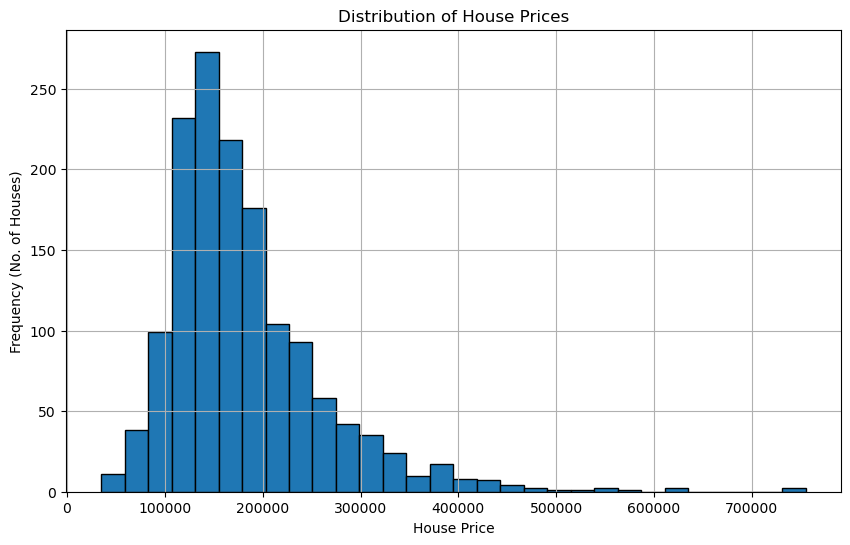

In [4]:
plt.figure(figsize=(10,6))
df['SalePrice'].hist(bins=30, edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('House Price')
plt.ylabel('Frequency (No. of Houses)')
plt.show()

# Data Cleaning

In [ ]:
### Data Handling

In [5]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns=[i  for i in df.columns if i not in numeric_columns]        
print(categorical_columns)

['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']


In [ ]:
### Encoding

In [6]:

label_encoder=LabelEncoder()
for i in categorical_columns:
    df[i]=label_encoder.fit_transform(df[i])
print(df.head())    

   Id  MSSubClass  MSZoning  LotArea  LotConfig  BldgType  OverallCond  \
0   0          60         3     8450          4         0            5   
1   1          20         3     9600          2         0            8   
2   2          60         3    11250          4         0            5   
3   3          70         3     9550          0         0            5   
4   4          60         3    14260          2         0            5   

   YearBuilt  YearRemodAdd  Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003           12         0.0        856.0   208500.0  
1       1976          1976            8         0.0       1262.0   181500.0  
2       2001          2002           12         0.0        920.0   223500.0  
3       1915          1970           13         0.0        756.0   140000.0  
4       2000          2000           12         0.0       1145.0   250000.0  


# Feature Analysis

In [ ]:
 ### making correlation matrix using seaborn

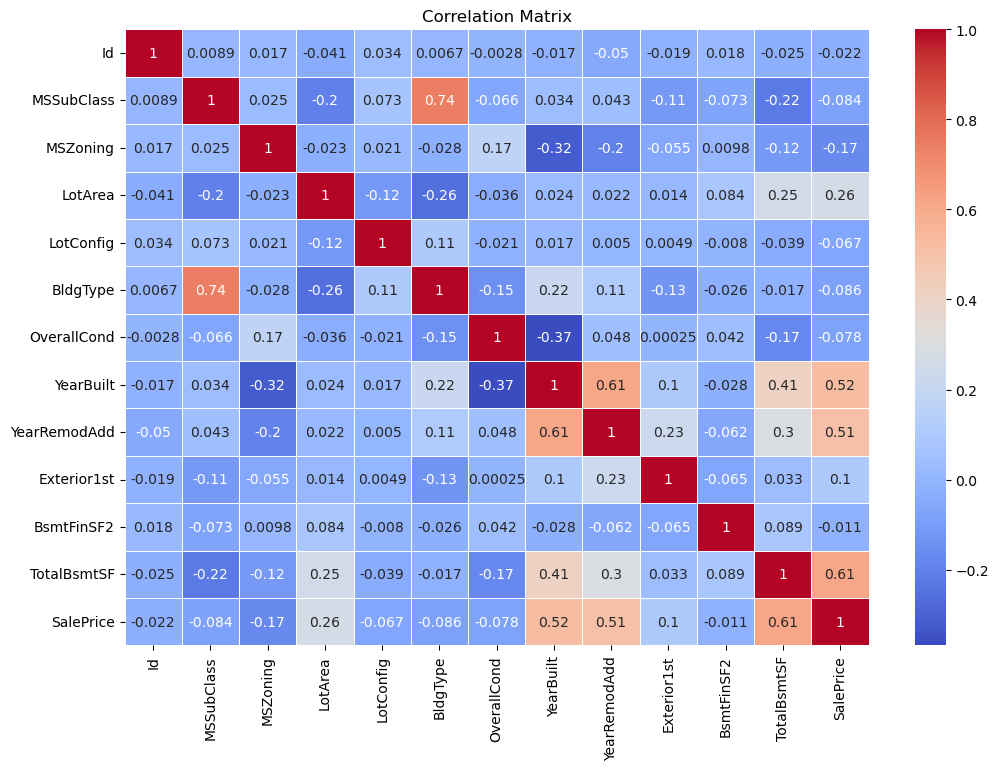

In [7]:

correlation_matrix=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [8]:
# Assuming correlation_matrix is the calculated correlation matrix
target_correlations = correlation_matrix['SalePrice'].sort_values(ascending=False)
print(target_correlations)


SalePrice       1.000000
TotalBsmtSF     0.613581
YearBuilt       0.522897
YearRemodAdd    0.507101
LotArea         0.263843
Exterior1st     0.103551
BsmtFinSF2     -0.011378
Id             -0.021917
LotConfig      -0.067396
OverallCond    -0.077856
MSSubClass     -0.084284
BldgType       -0.085591
MSZoning       -0.166872
Name: SalePrice, dtype: float64


In [ ]:
 ## Extracting Useful features

In [9]:
correlation_threshold=0.1
important_features = target_correlations[abs(target_correlations) > correlation_threshold].index.tolist()
important_features.remove('SalePrice')
print(important_features)

['TotalBsmtSF', 'YearBuilt', 'YearRemodAdd', 'LotArea', 'Exterior1st', 'MSZoning']


In [10]:
X = df[important_features]
y = df['SalePrice']

In [11]:
##     Data Preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler =  MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
# handling null values using simpleimputer

In [12]:
# Assuming X is your feature matrix
imputer = SimpleImputer(strategy='mean')  # Use 'mean', 'median', 'most_frequent', or a constant value
X = imputer.fit_transform(X)
y=y.values.reshape(-1,1)
y = imputer.fit_transform(y)

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X = poly.fit_transform(X)

In [14]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print(X_train.shape,X_test.shape)

(2335, 28) (584, 28)


# Building Machine Learning Model

In [16]:
# Initialize and train a linear regression model
model = make_pipeline(MinMaxScaler(), PolynomialFeatures(degree=2), LinearRegression())

model.fit(X_train, y_train)


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [17]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Model Evaluation

In [18]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 55823243439.32157
R-squared (R2): -14.651185926350017


# Fine Tuning

In [ ]:
## compare various models to select the best fit model into out dataset

In [19]:
# Define regression models to compare
models = {
    'Linear Regression': make_pipeline(MinMaxScaler(), PolynomialFeatures(degree=2), LinearRegression()),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

In [20]:
# Evaluate different algorithms
results = {}
for name, model in models.items():
    num_folds = 5
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    cv_score = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    results[name] = -np.mean(cv_score)


C:\Users\SUHAIL MALIK\anaconda _new\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\SUHAIL MALIK\anaconda _new\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\SUHAIL MALIK\anaconda _new\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\SUHAIL MALIK\anaconda _new\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

In [21]:
# Print the results
for name, score in results.items():
    print(f"{name}: Average Cross-Validation MSE = {score}")

Linear Regression: Average Cross-Validation MSE = 89022710601.08969
Random Forest: Average Cross-Validation MSE = 2239499185.6527114
Gradient Boosting: Average Cross-Validation MSE = 2159272648.256381


In [22]:
# Choose the best model and evaluate on the test set
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

Best Model: Gradient Boosting


In [23]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

C:\Users\SUHAIL MALIK\anaconda _new\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Evaluation on Best Model

In [24]:
test_mse = mean_squared_error(y_test, y_pred)
r2 = best_model.score(X_test, y_test)
print(f"R-squared Score with Best Model: {r2}")
print(f"Test Set MSE for Best Model: {test_mse}")

R-squared Score with Best Model: 0.35388653724983954
Test Set MSE for Best Model: 2304499434.755397


In [28]:
# Hyperparameter tuning for the best model
if best_model_name == 'Random Forest' or best_model_name == 'Gradient Boosting':
    param_grid = {}  # Add relevant hyperparameters to optimize
    grid_search = GridSearchCV(best_model, param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)
    grid_search.fit(X_train, y_train.ravel())

    best_model_tuned = grid_search.best_estimator_
    y_pred_tuned = best_model_tuned.predict(X_test)

    # Model evaluation on the test set after tuning
    test_mse_tuned = mean_squared_error(y_test, y_pred_tuned)
    r2_tuned = best_model_tuned.score(X_test, y_test)

    print(f"Tuned Best Model: {best_model_name}")
    print(f"Tuned R-squared Score with Best Model: {r2_tuned}")
    print(f"Tuned Test Set MSE for Best Model: {test_mse_tuned}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tuned Best Model: Gradient Boosting
Tuned R-squared Score with Best Model: 0.35388653724983954
Tuned Test Set MSE for Best Model: 2304499434.755397
